In [1]:
pip install pandas seaborn matplotlib numpy


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

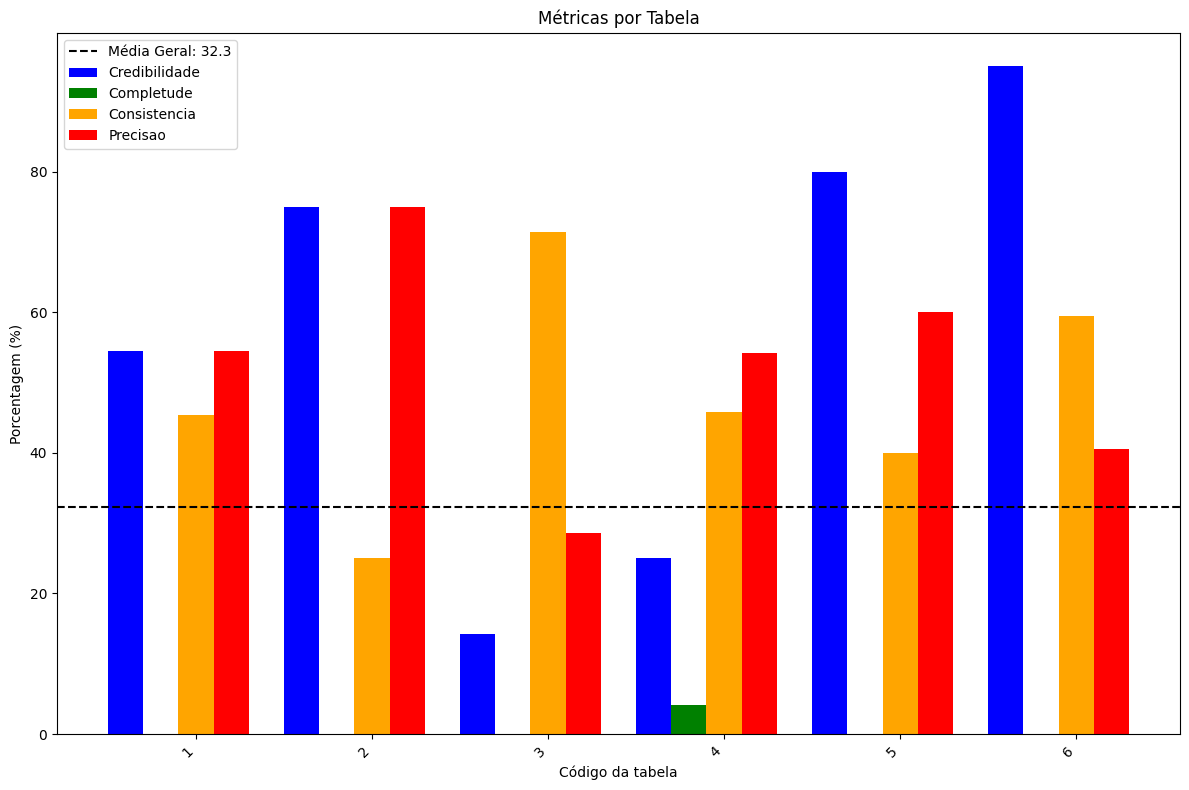

In [3]:
from collections import Counter
# Carregar os dados do CSV usando o pandas
dados = pd.read_csv('/home/juan/Documents/meta-qd/data/analysis/metricas_ufrpe.csv')

# Converter os dados de float para porcentagem
dados['credibilidade'] *= 100
dados['completude'] *= 100
dados['consistencia'] *= 100
dados['precisao'] *= 100

# Definir cores distintas para cada métrica
cores = {'credibilidade': 'blue', 'completude': 'green', 'consistencia': 'orange', 'precisao': 'red'}

# Configurar as posições das barras para cada base/metadado
posicoes = np.arange(len(dados['nome_da_tabela']))

# Largura das barras
largura_barra = 0.2

# Criar um gráfico de barras agrupadas
plt.figure(figsize=(12, 8))

for i, metrica in enumerate(dados.columns[2:]):
    plt.bar(posicoes + i * largura_barra, dados[metrica], width=largura_barra, color=cores[metrica], label=metrica.capitalize())

# Adicionar uma linha horizontal para a média geral
media_geral = dados.iloc[:, 1:].mean().mean()
plt.axhline(y=media_geral, color='black', linestyle='--', label=f'Média Geral: {round(media_geral, 2)}')

# Ajustar rótulos e título
plt.xlabel('Código da tabela')
plt.ylabel('Porcentagem (%)')
plt.title('Métricas por Tabela')
plt.xticks(posicoes + largura_barra * (len(dados.columns[1:]) - 1) / 2, dados['id_tabela'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()


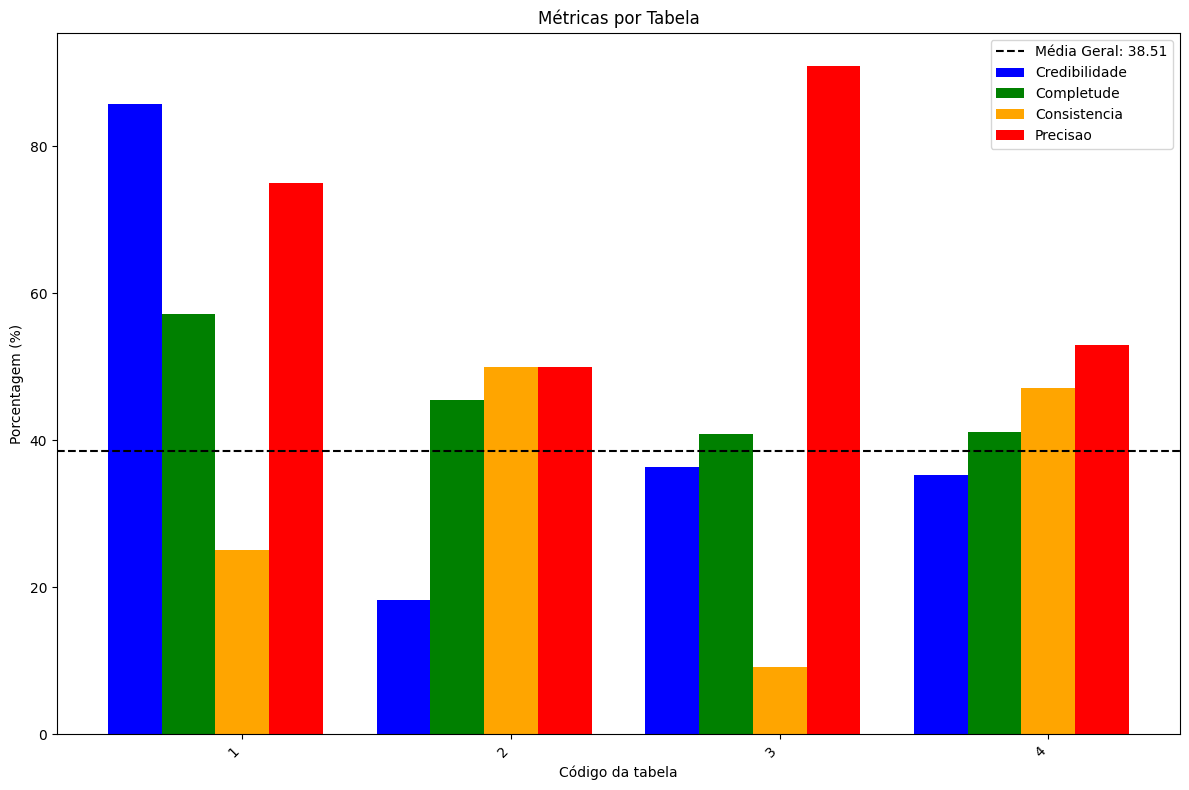

In [4]:
# Carregar os dados do CSV usando o pandas
dados = pd.read_csv('/home/juan/Documents/meta-qd/data/analysis/metricas_ufrn.csv')

# Converter os dados de float para porcentagem
dados['credibilidade'] *= 100
dados['completude'] *= 100
dados['consistencia'] *= 100
dados['precisao'] *= 100

# Definir cores distintas para cada métrica
cores = {'credibilidade': 'blue', 'completude': 'green', 'consistencia': 'orange', 'precisao': 'red'}

# Configurar as posições das barras para cada base/metadado
posicoes = np.arange(len(dados['nome_da_tabela']))

# Largura das barras
largura_barra = 0.2

# Criar um gráfico de barras agrupadas
plt.figure(figsize=(12, 8))

for i, metrica in enumerate(dados.columns[2:]):
    plt.bar(posicoes + i * largura_barra, dados[metrica], width=largura_barra, color=cores[metrica], label=metrica.capitalize())

# Adicionar uma linha horizontal para a média geral
media_geral = dados.iloc[:, 1:].mean().mean()
plt.axhline(y=media_geral, color='black', linestyle='--', label=f'Média Geral: {round(media_geral, 2)}')

# Ajustar rótulos e título
plt.xlabel('Código da tabela')
plt.ylabel('Porcentagem (%)')
plt.title('Métricas por Tabela')
plt.xticks(posicoes + largura_barra * (len(dados.columns[1:]) - 1) / 2, dados['id_tabela'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

In [5]:
# Agora fazendo um gráfico de radar para comparação entre as duas


In [23]:
import json
import pandas as pd

# Carregar o arquivo JSON
nomes_arquivos = ['/home/juan/Documents/meta-qd/data/metadata/ufrpe/censo_cursos_metadados.json',
                  '/home/juan/Documents/meta-qd/data/metadata/ufrpe/componentes_por_curriculo_metadados.json',
                  '/home/juan/Documents/meta-qd/data/metadata/ufrpe/ensino_de_graduacao_metadados.json',
                  '/home/juan/Documents/meta-qd/data/metadata/ufrpe/liquidacoes_metadados.json',
                  '/home/juan/Documents/meta-qd/data/metadata/ufrpe/matriculados_turma_graduacao_metadados.json',
                  '/home/juan/Documents/meta-qd/data/metadata/ufrpe/qtd_alunos_graduacao_metadados.json']

medias_ufrpe = []
# Loop sobre os arquivos
for nome_arquivo in nomes_arquivos:
    # Carregar o arquivo JSON
    with open(nome_arquivo) as arquivo:
        dados = json.load(arquivo)

    # Acessar apenas a chave 'valores_distintos_por_coluna'
    valores_distintos = dados['valores_distintos_por_coluna']

    # Converter o dicionário para um DataFrame
    df = pd.DataFrame.from_dict(valores_distintos, orient='index', columns=['Valor'])

    # Calcular a média
    media = df.mean().iloc[0]  # Obtém apenas o valor da média

    # Adicionar a média à lista
    medias_ufrpe.append(media)

print("Médias dos valores UFRPE:", medias_ufrpe)  # Exibe as médias dos valores


# Carregar o arquivo JSON
nomes_arquivos_ufrn = ['/home/juan/Documents/meta-qd/data/metadata/ufrn/componentes_por_curriculo_metadados.json',
                  '/home/juan/Documents/meta-qd/data/metadata/ufrn/ensino_de_graduacao_metadados.json',
                  '/home/juan/Documents/meta-qd/data/metadata/ufrn/liquidacoes_metadados.json',
                  '/home/juan/Documents/meta-qd/data/metadata/ufrn/matriculados_turma_graduacao_metadados.json']
medias_ufrn = []
# Loop sobre os arquivos
for nome_arquivo in nomes_arquivos_ufrn:
    # Carregar o arquivo JSON
    with open(nome_arquivo) as arquivo:
        dados = json.load(arquivo)

    # Acessar apenas a chave 'valores_distintos_por_coluna'
    valores_distintos = dados['valores_distintos_por_coluna']

    # Converter o dicionário para um DataFrame
    df = pd.DataFrame.from_dict(valores_distintos, orient='index', columns=['Valor'])

    # Calcular a média
    media = df.mean().iloc[0]  # Obtém apenas o valor da média

    # Adicionar a média à lista
    medias_ufrn.append(media)

print("Médias dos valores UFRN:", medias_ufrn)  # Exibe as médias dos valores




# Converter a lista para um DataFrame
df_ufrn = pd.DataFrame(medias_ufrn, columns=['Valor'])
df_ufrpe = pd.DataFrame(medias_ufrpe, columns=['Valor'])

# Calcular a média
media_df_ufrn = df_ufrn.mean().iloc[0]  # Obtém apenas o valor da média
media_df_ufrpe = df_ufrpe.mean().iloc[0]  # Obtém apenas o valor da média


print("Média dos valores:", media_df_ufrn)  # Exibe a média dos valores
print("Média dos valores:", media_df_ufrpe)  # Exibe a média dos valores

Médias dos valores UFRPE: [13.35, 502.45454545454544, 19.857142857142858, 479.5416666666667, 306.9, 27.75]
Médias dos valores UFRN: [83.25, 34.95454545454545, 19736.18181818182, 2037.8235294117646]
Média dos valores: 5473.052473262032
Média dos valores: 224.9755591630592
